<a href="https://colab.research.google.com/github/kuldip11/DS-Algo/blob/master/Copy_of_Copy_of_Sol1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

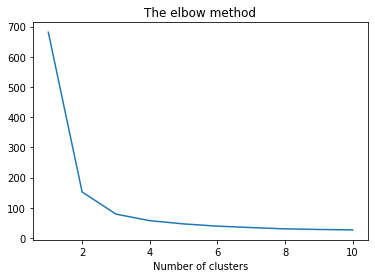

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = datasets.load_iris().data
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
#creatind dataframe using dataset iris
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame({'sepal length (cm)': iris.data[:,0], 'sepal width (cm)': iris.data[:,1], 'cluster': iris.target})
iris_df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [ ]:
centroids={}
for i in range(3):
  result_list=[]
  result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal length (cm)'].mean())
  result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal width (cm)'].mean())
  centroids[i]=result_list

In [ ]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

No handles with labels found to put in legend.


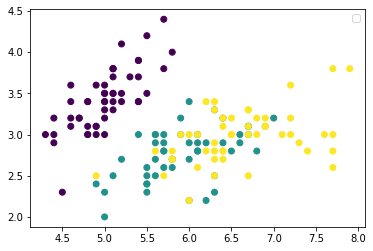

In [ ]:
#plotting datapoint
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'], c=iris.target)
plt.legend()

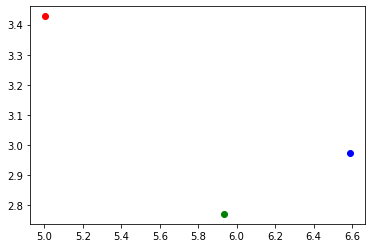

In [ ]:
#plotting centroids
colmap={0: 'r', 1: 'g', 2:'b'}
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

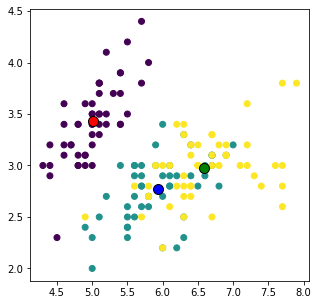

In [ ]:
#plotting data point with there centroid
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris.target)
col=[0,1]
colmap={0: 'r', 1: 'b', 2:'g'}
for i in range(3):
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],edgecolors='k', s=100) 
plt.show()

In [ ]:
def distance(df,centroids):
  for i in range(3):
    df['distance_from{}'.format(i)] =(np.sqrt((df['sepal length (cm)']-centroids[i][0]) **2 + (df['sepal width (cm)']-centroids[i][1])**2))
  return df

In [ ]:
df=distance(iris_df,centroids)

In [ ]:
centroid_distance_cols=['distance_from{}'.format(i) for i in range(3)]
df['closest_centroid']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
df['closest_centroid']=df['closest_centroid'].map(lambda x: int(x.lstrip('distance_from')))
df['color']=df['closest_centroid'].map(lambda x: colmap[x])

In [ ]:
df

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,g
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,b
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,g
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,g


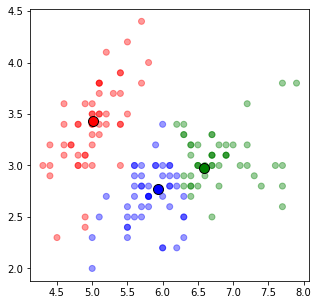

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=df['color'],alpha=0.4)
for i in range(3):
  plt.scatter(*centroids[i],color=colmap[i],s=100,edgecolors='k')
plt.show()